<a href="https://colab.research.google.com/github/MosheHabaz/LendingClub-Neural-network-model/blob/master/loan_project_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Keras Project using Google Colab**
## The Dataset LendingClub DataSet obtained from Kaggle
### Wikipedia information about LendingClub:
LendingClub is an American peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform. The company claims that $15.98 billion in loans had been originated through its platform up to December 31, 2015.

LendingClub enables borrowers to create unsecured personal loans between 
1,000 and 40,000 dollars. The standard loan period is three years. Investors can search and browse the loan listings on LendingClub website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. LendingClub makes money by charging borrowers an origination fee and investors a service fee.


### Goal:

building a model that can predict wether or nor a borrower will pay back their loan. 
using an historical data on loans given out with information on whether or not the borrower defaulted .



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



----

Data overview :
----


In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [ ]:
data_info = pd.read_csv('/content/drive/My Drive/Colab Notebooks/loan/DATA/column_info.csv',index_col='LoanStatNew')
data_info

,Description
LoanStatNew,
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when applying for the loan.*
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"


Imports:

In [ ]:
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/loan/DATA/loan_db.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  


# Section 1: Data Analysis


*   Understanding which variables are important
*   View summary statistics
*   Data Analysis
*   Visualize the data


----

##Exploring loan status, loan amnt and installment columns

**loan_amnt** is the listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

The target variable is : **'loan status'** the current status of the loan.

Count Plot of the taget variable (loan status) :

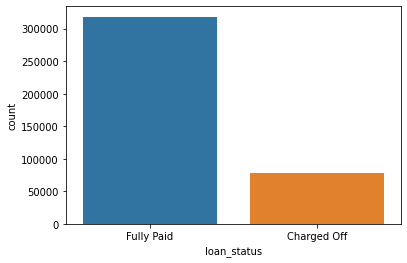

In [ ]:
sns.countplot(df['loan_status'])

The Count Plot of the taget variable (**loan status**) indicates that this is an imbalanced problem.
Notice that we have a lot more entries of people that **fully pay** off their loans than we have people that didn't pay back (**charged off**).

Histogram of the loan amount:

(0.0, 45000.0)

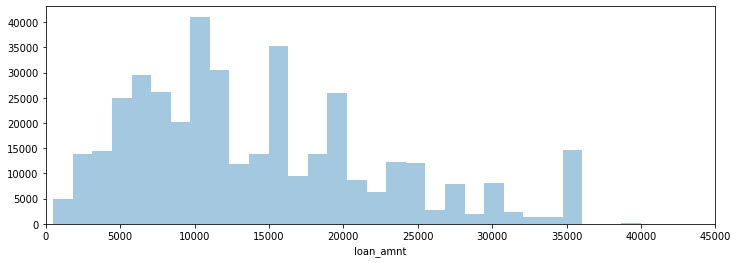

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=30)
plt.xlim(0,45000)

Histogram of the loan amount column  (Notice these bean spikes are happening because there is even loan amounts  instead of a spike at some random value)












































































































































































Correlation between the continuous feature variables:

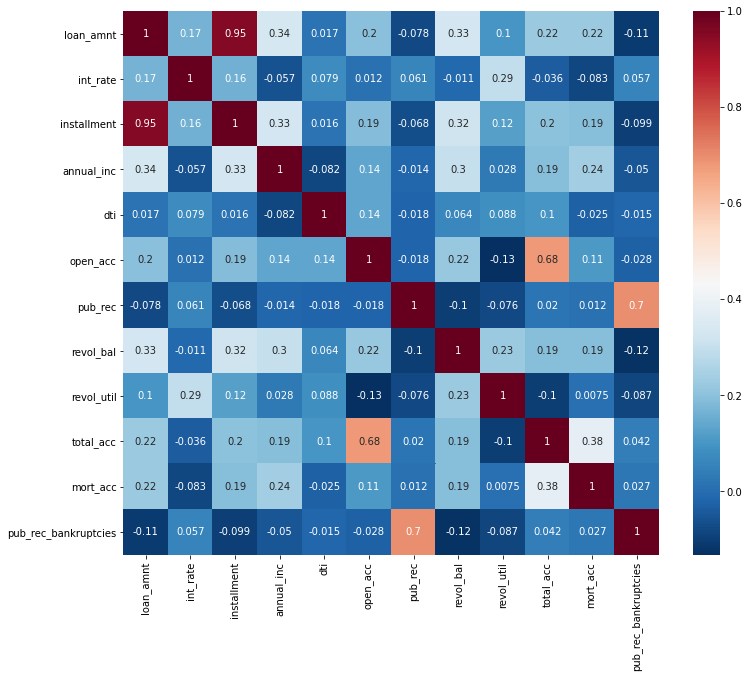

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot= True,cmap = 'RdBu_r')

There is almost perfect correlation (95%) with the **'installment'** feature and **'loan_amnt'** .
For preventing data leakage it is necessary to explore these features further.

**installment** is The monthly payment owed by the borrower if the loan originates.
**loan_amnt** is The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

From the feature description it can be assumed that the company probably use calculation of the loan amount to figure out what the installment should be.

Using a scatter plot we can view this high correlation:

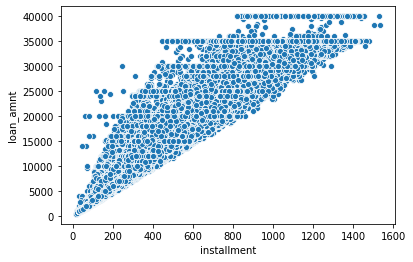

In [ ]:
sns.scatterplot( x='installment',y='loan_amnt',data=df)


Box plot of the loan status and the loan amount:

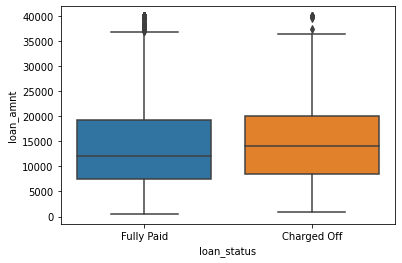

In [ ]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df )

Using a box plot we can show the relationship between the **loan status** and the **loan amount**.
we would answer the question is there a relationship between really expensive loans and not being able to pay them off or very low amount loans and then fully paying those off.

The 'charged off' average in this box plot is slightly higher, that indicates if our loan amount is higher we have a slight increase in the likelihood of it being 'charged off' which intuitively makes sense - that it's harder to pay back larger loans than it is.


Summary statistics for the **loan amount**, grouped by the loan_status
we can see the **charged off** average price is a little higher than the **fully paid** loan. 

In [ ]:
df.groupby(['loan_status'])['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


All this is indicate that the averages of the loans for people that aren't able to pay them back are slightly higher than the averages for people that do pay off their loans.

----

##Exploring the Grade and SubGrade columns that LendingClub assigned to the loans.


In [ ]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [ ]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

Bar plots of **grade** that are based off the **loan_status** :

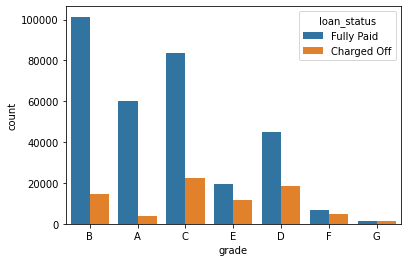

In [ ]:
sns.countplot(df['grade'], hue=df['loan_status'])

we can see that F and G grade are the worst grade categories,
it looks like the charged off rate is almost the same as the fully paid rate so it should consider if it's worth to give these people loans.

Bar plots of **Sub-grade** that are based off the **loan_status** :

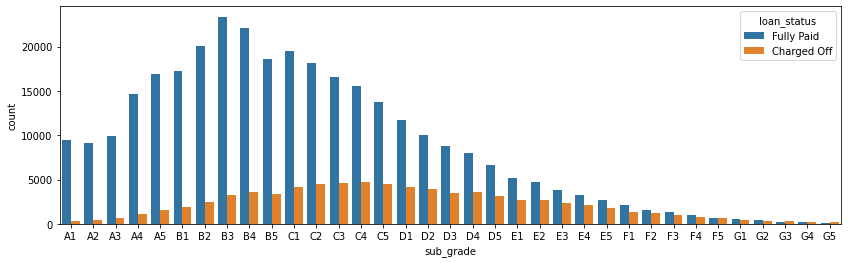

In [ ]:
plt.figure(figsize=(14,4))
sns.countplot(df['sub_grade'] ,hue = df['loan_status'], order=sorted(df['sub_grade'].unique())  )

Let's zoom in to F and G grades by subset of the data frame:

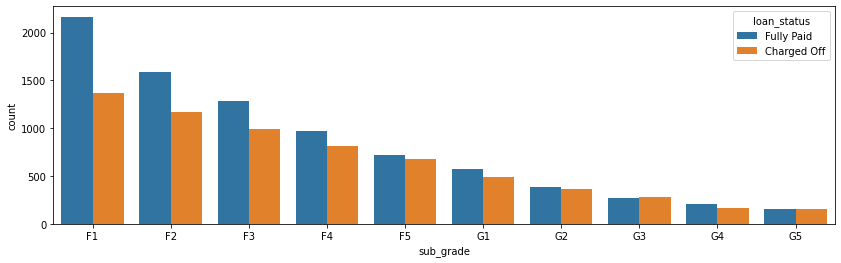

In [ ]:
plt.figure(figsize=(14,4))
masc = df[(df['grade'] == 'G') | (df['grade'] == 'F') ]
ordered = sorted(masc['sub_grade'].unique())
sns.countplot( masc['sub_grade'] , hue = df['loan_status'], order=ordered   )


We can see the fully paid status versus charge off status for these essentially
worse sub grades.
the likelihood is almost the same as fully paying off your loan versus being charged off on the loan.

----



##Creating a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [ ]:
# CODE HERE
def converting(returned) :
    if returned == 'Fully Paid' :
        return 1
    elif returned == 'Charged Off' :
        return 0

    

In [ ]:
df['loan_repaid'] = df['loan_status'].apply(converting)
# df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [ ]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


Bar plot that show the correlation of the numeric features to the new loan_repaid column:

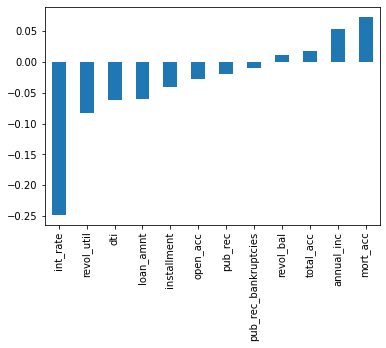

In [ ]:
#df.corr()['loan_repaid'][:-1].sort_values().plot(kind = 'bar')
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar' )


**interest rate**  has essentially the highest negative correlation with whether or not someone's going to repay their loan which kind of makes sense.
extremely high interest it's a cause to find it harder to pay off a loan.

---
---
# Section 2: Data PreProcessing

 Goals: 
 

*   Removing or filling any missing data. 
*   Removing unnecessary or repetitive features. 
*   Converting categorical string features to dummy variables.



In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


## Missing Data

exploring the missing data columns. using factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.

The length of the dataframe:

In [ ]:

df.shape[0]
#len(df)

396030

Displaying the total count of missing values per column (count and precentage)
shows that we have missing values of employment title ,employment length ,title,
mort_acc and also public record of bankruptcies.

In [ ]:
df.isnull().sum()


loan_amnt               0    
term                    0    
int_rate                0    
installment             0    
grade                   0    
sub_grade               0    
emp_title               22927
emp_length              18301
home_ownership          0    
annual_inc              0    
verification_status     0    
issue_d                 0    
loan_status             0    
purpose                 0    
title                   1755 
dti                     0    
earliest_cr_line        0    
open_acc                0    
pub_rec                 0    
revol_bal               0    
revol_util              276  
total_acc               0    
initial_list_status     0    
application_type        0    
mort_acc                37795
pub_rec_bankruptcies    535  
address                 0    
loan_repaid             0    
dtype: int64

In percentage :

In [ ]:
df.isnull().sum()*100/ len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

So it looks like we need to focus on mortgage accounts because we can't
drop 10 percent of our data.
Some of these are so minor and are less than half a percent of our data, so it's ok to drop some of these.

We should examin of **emp_title** (The job title supplied by the Borrower) and **emp_length** (Employment length in years) to see whether it will be okay to drop them.

The unique values that are in the 'emp_title':

In [ ]:
len(df['emp_title'].unique())

173106

In [ ]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Appliance receiver         1   
Staff Director             1   
Archdiocese of Portland    1   
IT Analyist                1   
ILCSC                      1   
Name: emp_title, Length: 173105, dtype: int64

there are too many uniques emp_title and it's not informative to convert this to meaningful dummy variable feature, so instead of that it's preferable to remove that title because it's not  be useful to us .

In [ ]:
df = df.drop('emp_title', axis = 1 )

----

Creating a count plot of the emp_length feature column:

In [ ]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [ ]:
arr_sorted = [
 '< 1 year',
'1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
'10+ years',]

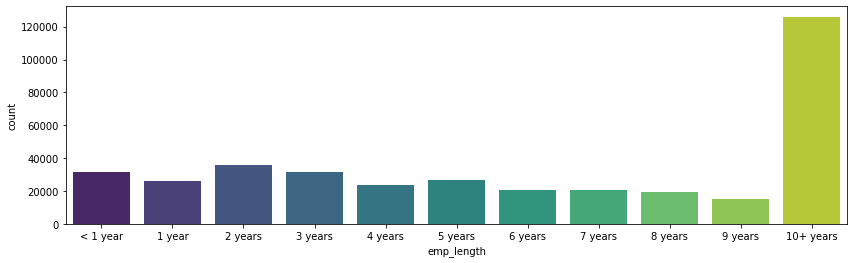

In [ ]:
plt.figure(figsize=(14,4))
sns.countplot(df['emp_length'], palette = 'viridis', order=arr_sorted )


It looks like quite the majority of people have been working in their employment for 10 plus years, which makes sense if you're taking a loan you're very likely to have a job, otherwise how are you going to pay it back.

So most people have been working for more than a year .




The relationship between fully paid off versus charged off per employment length represeted by the following countplot:

It looks like the ratio of the Fully Paid and the Charged off is essentially the same across all these employment length categories then this isn't a very informative feature.

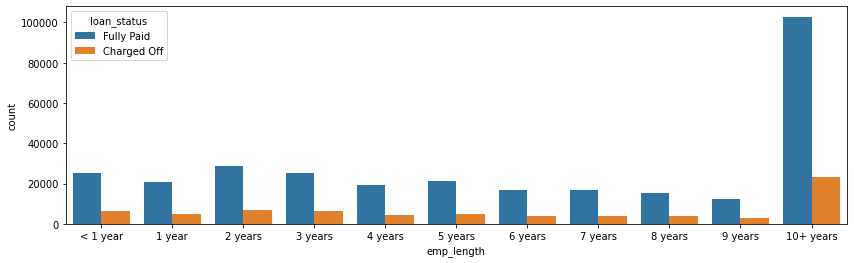

In [ ]:
plt.figure(figsize=(14,4))
sns.countplot(df['emp_length'],  order=arr_sorted, hue = df['loan_status'] )

This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what would be meaningful is the percentage of charge offs per category. 

What percent of people per employment category didn't pay back their loan ?

In [ ]:
df_group_ChargedOff = (df[df['loan_status'] == 'Charged Off'].groupby(['emp_length'])['emp_length'].count())
df_group_fullyPaid = df[df['loan_status'] == 'Fully Paid'].groupby(['emp_length'])['emp_length'].count()

In [ ]:
precentage = df_group_ChargedOff*100/( df_group_fullyPaid +df_group_ChargedOff)

In [ ]:
precentage

emp_length
1 year       19.913453
10+ years    18.418610
2 years      19.326206
3 years      19.523133
4 years      19.238477
5 years      19.218721
6 years      18.919438
7 years      19.477400
8 years      19.976002
9 years      20.047016
< 1 year     20.687155
Name: emp_length, dtype: float64

So it looks like this particular feature of employment length doesn't actually have some extreme differences on the charge off rates.

So it looks like regardless of what actual employment length you have if you were to pick someone about 20% of them are going to have not paid back their loans.

droping the emp_length column:

In [ ]:
df.drop('emp_length' , axis= 1 ,inplace = True)


Other feature columns still have missing data :

In [ ]:
df.isnull().sum()

loan_amnt               0    
term                    0    
int_rate                0    
installment             0    
grade                   0    
sub_grade               0    
home_ownership          0    
annual_inc              0    
verification_status     0    
issue_d                 0    
loan_status             0    
purpose                 0    
title                   1755 
dti                     0    
earliest_cr_line        0    
open_acc                0    
pub_rec                 0    
revol_bal               0    
revol_util              276  
total_acc               0    
initial_list_status     0    
application_type        0    
mort_acc                37795
pub_rec_bankruptcies    535  
address                 0    
loan_repaid             0    
dtype: int64

After reviewing the title column vs the purpose column -
The title column is simply a string subcategory/description of the purpose column.  

In [ ]:
df['purpose'].head(10)

0    vacation          
1    debt_consolidation
2    credit_card       
3    credit_card       
4    credit_card       
5    debt_consolidation
6    home_improvement  
7    credit_card       
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

Droping the title column:

In [ ]:
df.drop('title' , axis= 1 ,inplace = True)

##Filling in missing data based on the values of another column in the data frame:

 **mort_acc** feature represents the number of mortgage accounts.

 a value_counts of the mort_acc column:



In [ ]:
df['mort_acc'].value_counts()

0.0     139777
1.0     60416 
2.0     49948 
3.0     38049 
4.0     27887 
5.0     18194 
6.0     11069 
7.0     6052  
8.0     3121  
9.0     1656  
10.0    865   
11.0    479   
12.0    264   
13.0    146   
14.0    107   
15.0    61    
16.0    37    
17.0    22    
18.0    18    
19.0    15    
20.0    13    
24.0    10    
22.0    7     
21.0    4     
25.0    4     
27.0    3     
23.0    2     
32.0    2     
26.0    2     
31.0    2     
30.0    1     
28.0    1     
34.0    1     
Name: mort_acc, dtype: int64

In [ ]:
df['mort_acc'].shape[0]

396030

 It looks like the majority of people have zero other mortgage accounts and it looks like that's almost 25% of our data.
missing values we have in this column : almost 10% of all our
values are missing from this mortgage account number.
So that means that we can't drop them.

We try to figure out which of the other features that we have, correlates highly with this mortgage accounts and see if we can use that to fill in our information based on the mean of the other columns.


In [ ]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

Looks like the **total_acc** (The total number of credit lines currently in the borrower's credit file) feature positive correlates with the **mort_acc** , this makes sense. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. 

now we can see the average mortgage account value per total account grouping.

In [ ]:
avg_mort_acc_by_totalAcc = df.groupby(['total_acc'])['mort_acc'].mean()
avg_mort_acc_by_totalAcc

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

using this series we can fill in the missing mort_acc values based on their total_acc value.  
If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. 

In [ ]:
def fill_mort (total_acc , mort_acc):
    if np.isnan(mort_acc) :
        return avg_mort_acc_by_totalAcc[total_acc]
    else:
        return mort_acc 

    

In [ ]:
df['mort_acc'] = df.apply(lambda x : fill_mort(x['total_acc'],x['mort_acc']), axis = 1 )

In [ ]:
df.isnull().sum()


loan_amnt               0  
term                    0  
int_rate                0  
installment             0  
grade                   0  
sub_grade               0  
home_ownership          0  
annual_inc              0  
verification_status     0  
issue_d                 0  
loan_status             0  
purpose                 0  
dti                     0  
earliest_cr_line        0  
open_acc                0  
pub_rec                 0  
revol_bal               0  
revol_util              276
total_acc               0  
initial_list_status     0  
application_type        0  
mort_acc                0  
pub_rec_bankruptcies    535
address                 0  
loan_repaid             0  
dtype: int64

It should be notice that the mortgage account column is now at a 0 which leaves us with **revol_util** and **pub_rec_bankruptcies** that they left with missing data.

However this is such a small percentage of our overall dataset so we can drop them.

In [ ]:
df = df.dropna()

Now there are not Null values in the data set .

In [ ]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

----

## Categorical Variables and Dummy Variables

Now we just need to deal with the string values due to the categorical columns.


In [ ]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')


Examination the string features to see what we should do with them :

---



*   Converting the **term** feature into integer numeric data type :





In [ ]:
df['term'].value_counts()

 36 months    301247
 60 months    93972 
Name: term, dtype: int64

In [ ]:
df['term']=df['term'].apply(lambda x : int(x[:3]) )

*   Dropping the **grade** feature because is a part of sub_grade

In [ ]:
df.drop('grade',axis=1,inplace=True)

*   Converting the **subgrade** into dummy variables, then concatenating these new columns to the original dataframe.

In [ ]:
dummies = pd.get_dummies(df['sub_grade'] ,drop_first = True)


In [ ]:
df = pd.concat( [df.drop('sub_grade' ,axis=1) ,dummies  ] ,axis= 1)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


*   **verification_status, application_type,initial_list_status,purpose** : Converting these columns into dummy variables and concatenating them with the original dataframe.

In [ ]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose'] ] ,drop_first = True)
df = pd.concat( [df.drop(['verification_status', 'application_type','initial_list_status','purpose']  ,axis=1) ,dummies  ] ,axis= 1)

*   **home_ownership** (The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER). The value_counts for the home_ownership column:

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN         37660 
OTHER       110   
NONE        29    
ANY         3     
Name: home_ownership, dtype: int64

In [ ]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN         37660 
OTHER       142   
Name: home_ownership, dtype: int64

In [ ]:
dummies = pd.get_dummies(df['home_ownership'] ,drop_first = True)

df = pd.concat( [df.drop('home_ownership' ,axis=1) ,dummies  ] ,axis= 1)

*   **address**: Feature engineer -extracting the zip code column from the address in the data set. 

In [ ]:
df['address']

0         0174 Michelle Gateway\nMendozaberg, OK 22690        
1         1076 Carney Fort Apt. 347\nLoganmouth, SD 05113     
2         87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113     
3         823 Reid Ford\nDelacruzside, MA 00813               
4         679 Luna Roads\nGreggshire, VA 11650                
                          ...                                 
396025    12951 Williams Crossing\nJohnnyville, DC 30723      
396026    0114 Fowler Field Suite 028\nRachelborough, LA 05113
396027    953 Matthew Points Suite 414\nReedfort, NY 70466    
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 29597  
396029    787 Michelle Causeway\nBriannaton, AR 48052         
Name: address, Length: 395219, dtype: object

In [ ]:
df['zip_code'] = df['address'].apply (lambda x:  (x[-5 :]) )

In [ ]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

It looks like there is a total of 10 zip codes so we can get dummy features from it.

In [ ]:
dummies = pd.get_dummies(df['zip_code'] ,drop_first = True)

df = pd.concat( [df.drop('zip_code' ,axis=1) ,dummies  ] ,axis= 1)

In [ ]:
df = df.drop('address', axis= 1 )

*   **issue_d** (The month which the loan was funded): This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, so we have to drop this feature.

In [ ]:
df = df.drop('issue_d',axis = 1)

*   **earliest_cr_line** (The month the borrower's earliest reported credit line was opened)
Extracting the year from this feature using a apply function, and converting it to a numeric feature.

In [ ]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x : int(x[-4:]))


*   dropping the **load_status** column , since its a duplicate of the loan_repaid 
column.

In [ ]:
df = df.drop('loan_status', axis= 1 )
df['loan_repaid']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repaid, Length: 395219, dtype: int64


---



---


#**Section 3 : First Model**




---



---


## Train Test Split





Import train_test_split from sklearn

In [ ]:
from sklearn.model_selection import train_test_split 

Setting X and y variables to the values of the features and label (traget variable)

In [ ]:
X = df.drop('loan_repaid', axis= 1 ).values

y= df['loan_repaid'].values

In [ ]:

X.shape ,y.shape

((395219, 78), (395219,))

Performming a train\test split with test_size=0.2 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state= 101 ) 

## Normalizing the Data

Using a **MinMaxScaler** to normalize the feature data X_train and X_test. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train

array([[9.700e+03, 3.600e+01, 1.727e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+04, 3.600e+01, 1.365e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.335e+04, 6.000e+01, 1.727e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [8.550e+03, 3.600e+01, 9.670e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.200e+04, 6.000e+01, 1.624e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.500e+04, 3.600e+01, 1.999e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

## Creating the Model

import the necessary Keras functions

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
df.shape

(395219, 79)

Building a **sequential model** to will be trained on the data.
The rule of thumb is:  first layer should match the same number of features in the dataset and then the number of neurons will be the half for each layer.
finally the model would be:  78 --> 39 --> 19--> 1 output neuron. 

then the activation function we will choose is **rectified linear unit** .


Beacuse the problem is performing binary classification which means we should have one neuron at the very end so units is equal to one and it should be using an **sigmoid activation function**.
Sigmoid activation function pushes values to be between 0 and 1 and next we're going to do is we will compile the model .

the **dropout layers** will essentially turn off a percentage of neurons randomly.
The **loss** should be **binary cross entropy** and our optimizer would be **Adam** .

In [ ]:
model = Sequential()



# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer - binary classifiaction problem 
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

Fitting the model to the training data with 25 epochs and adding in the validation data for later plotting and  a **batch_size** of 256 

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=40,
          batch_size=256,
          validation_data=(X_test, y_test), 
)

Epoch 1/40
1236/1236 [==============================] - 3s 2ms/step - loss: 0.3067 - val_loss: 0.2643
Epoch 2/40
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2678 - val_loss: 0.2637
Epoch 3/40
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2644 - val_loss: 0.2623
Epoch 4/40
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2624 - val_loss: 0.2626
Epoch 5/40
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2614 - val_loss: 0.2618
Epoch 6/40
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2608 - val_loss: 0.2623
Epoch 7/40
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2604 - val_loss: 0.2619
Epoch 8/40
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2596 - val_loss: 0.2633
Epoch 9/40
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2592 - val_loss: 0.2618
Epoch 10/40
1236/1236 [==============================] - 3s 2ms/step - loss: 0.259

Saving the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('loan_model.h5')  

##Evaluating Model Performance.

Plotting out the validation loss versus the training loss (loss is the training loss and validation loss is the loss on our test set)

In [ ]:
losses = pd.DataFrame(model.history.history)

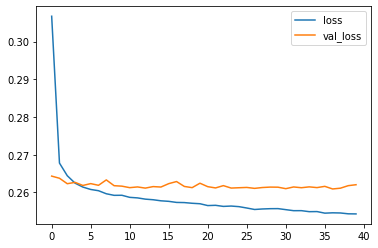

In [ ]:
losses[['loss','val_loss']].plot()

At a certain point in time notice that the training loss (blue line) is going down and validation loss is beginning to increase.

That basically tells us that we're **over fitting** to the training dataset so we have a clear indication here that we're training too many epochs.

Notice the validation list gets worse and worse after these epochs.
we are going to see if we can use **early stopping**
and using tensorflow Kares **callbacks** based on the validation loss stop the training before it gets down as shown here.


Creating predictions from the X_test set and display a **classification report** and **confusion matrix** for the X_test set:

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



**Accuracy** is the actual percent that we got right - we got 89% accuracy . At the beginning of this notebook we analyzed the actual label -**loan_status** itself and recall it's an imbalanced labels.

There is a lot more 'Fully paid' than there are 'Charged off' loans.

In the data set there are 317,696 'Fully_paid' records devided by 395,219 actual length of that dataset it is around 0.8 accuracy .

This is indicates that 80% of my points are already being predicted as loan repaid which means if I created a very simple model that simply said any loan will be repaid I would be 80% accurate.

So the bottom threshold is 80%  - which means our 89% accuracy here is OK but it's not good enough because of our imbalanced data set .

We got a good score on the **precision** but bad score on the **recall**.

The **F1 score** is the harmonic mean between precision and recall.

The true notification of whether or not this model is doing well is the F1 score on 0 class.

So we need a lot more context to decide whether or not this recall in this F1 score are good enough. We can say that the accuracy is better than just kind of a default random guess which would be 80%.

A random guess would get 50% accuracy a straight guess of always being repaid with get 80% accuracy and our model is getting 89% accuracy.

So we are performing better than both a random guess and a straight loan repaid return.

Confusion matrix : 

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f73276537f0>)

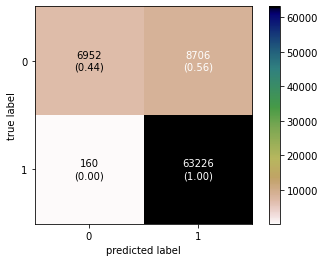

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


plot_confusion_matrix(conf_mat=confusion_matrix(y_test,predictions),
colorbar=True,  show_absolute=True, show_normed=True , cmap = 'gist_earth_r')



We can see from the confusion matrix that we mis-classifying a lot of the zero points (8876 records) which causes the low recall .


---



---


#**Section 4: Second Model**




---



---


##Improving the first model:



*   Balance the label
*   Early stopping
*   Changing the Dropout 



Imbalance problem affects the quality and reliability of results in machine learning task and, for this reason, we need to change the balance of the label.

In [ ]:
ntest1 = int(len(df) *0.1)
ntest2 = ntest1 + int(len(df) *0.1)
ntrain = int(len(df) -ntest2  )
ntest1 , ntest2, ntrain



(39521, 79042, 316177)

In [ ]:
df_test1 = df[df['loan_repaid'] == 0].iloc[ 0 : ntest1]
df_test1

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
4,24375.0,60,17.27,609.33,55000.0,33.95,1999,13.0,0.0,24584.0,69.8,43.0,1.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
25,6000.0,36,11.36,197.47,46680.0,6.56,2003,9.0,0.0,4370.0,40.1,10.0,0.429158,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
26,8400.0,36,13.35,284.45,35000.0,23.08,2004,6.0,0.0,6953.0,74.8,17.0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
36,3250.0,36,16.78,115.52,22500.0,18.76,2009,7.0,0.0,7587.0,54.6,7.0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
41,28000.0,60,19.91,312.04,52000.0,20.70,1988,10.0,0.0,29178.0,87.6,16.0,1.007405,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202488,30000.0,36,17.27,1073.62,75000.0,9.22,2002,4.0,0.0,1370.0,18.3,10.0,0.429158,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
202502,10500.0,60,15.61,253.17,98500.0,20.03,1997,11.0,0.0,17014.0,41.0,27.0,3.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
202508,22050.0,60,23.28,625.16,62000.0,15.00,1998,6.0,0.0,5810.0,95.2,15.0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
202513,10000.0,60,20.50,267.73,35000.0,6.41,2006,10.0,0.0,7418.0,51.5,15.0,2.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_test1['loan_repaid'].value_counts()

0    39521
Name: loan_repaid, dtype: int64

In [ ]:
X_test1 = df_test1.drop('loan_repaid', axis= 1 ).values

y_test1= df_test1['loan_repaid'].values

In [ ]:
#df[df['loan_repaid'] == 0]['loan_repaid'].value_counts()

df_test2_0 = df[df['loan_repaid'] == 0].iloc[ntest1 : ntest1 + int(ntest1/2) ]
df_test2_1 =  df[df['loan_repaid'] == 1].iloc[0 :int(ntest1/2) ]

df_test2 = pd.concat([df_test2_0,df_test2_1 ], axis = 0 )
df_test2


,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
202520,5000.0,36,11.67,165.29,35000.0,22.33,1997,11.0,0.0,6682.0,47.4,15.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
202522,10000.0,36,10.99,327.34,50419.0,27.18,1994,5.0,0.0,6220.0,55.0,17.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
202524,8000.0,36,15.61,279.72,63000.0,19.39,1988,6.0,0.0,3368.0,80.2,17.0,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
202531,5500.0,36,15.61,192.31,21000.0,13.71,2005,10.0,0.0,5764.0,73.0,14.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
202532,10000.0,60,18.24,255.25,60000.0,11.40,2000,10.0,0.0,1109.0,9.8,15.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24605,7200.0,36,14.09,246.40,32000.0,15.08,2000,12.0,0.0,11504.0,49.8,16.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
24607,24000.0,36,13.98,820.04,185000.0,7.03,2005,11.0,0.0,18215.0,58.0,27.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
24608,26000.0,36,16.99,926.85,85870.2,26.14,2004,12.0,0.0,8747.0,68.9,30.0,4.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
24609,15400.0,60,15.41,369.69,35000.0,21.16,2002,7.0,0.0,3902.0,26.5,11.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
df_test2['loan_repaid'].value_counts()

1    19760
0    19760
Name: loan_repaid, dtype: int64

In [ ]:
#from sklearn.utils import shuffle

#df_test2 = shuffle(df_test2)
#df_test2.shape

In [ ]:
X_test2 = df_test2.drop('loan_repaid', axis= 1 ).values

y_test2= df_test2['loan_repaid'].values

In [ ]:
df_train_0 = df[df['loan_repaid'] == 0].iloc[ntest1 + int(ntest1/2) :  ]
df_train_1 =  df[df['loan_repaid'] == 1].iloc[int(ntest1/2) : ]
df_train = pd.concat([df_train_0,df_train_1 ], axis = 0 )
df_train

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
303394,12000.0,60,12.69,271.14,33000.0,34.44,2000,6.0,0.0,15834.0,96.5,20.0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
303405,10000.0,36,11.99,332.10,40000.0,10.47,1999,10.0,1.0,11656.0,36.2,19.0,3.000000,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
303416,24000.0,60,16.59,591.19,135006.0,34.06,1993,18.0,0.0,37773.0,86.0,41.0,11.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
303417,20000.0,36,9.99,645.25,110000.0,2.97,2002,5.0,0.0,7251.0,51.8,30.0,2.000000,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
303422,10000.0,36,13.98,341.68,43674.0,20.58,1998,9.0,1.0,10928.0,90.3,22.0,2.000000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,15.63,2004,6.0,0.0,1990.0,34.3,23.0,0.000000,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.29,700.42,110000.0,21.45,2006,6.0,0.0,43263.0,95.7,8.0,1.000000,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,17.56,1997,15.0,0.0,32704.0,66.9,23.0,0.000000,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.31,503.02,64000.0,15.88,1990,9.0,0.0,15704.0,53.8,20.0,5.000000,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
#df_train = shuffle(df_train)

In [ ]:
df_train['loan_repaid'].value_counts()

1    297936
0    18242 
Name: loan_repaid, dtype: int64

In [ ]:
X_train = df_train.drop('loan_repaid', axis= 1 ).values

y_train= df_train['loan_repaid'].values

X_train.shape ,y_train.shape

((316178, 78), (316178,))

One approach to addressing imbalanced datasets is to oversample the minority class. The approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. 

In [ ]:
from imblearn.combine import SMOTETomek

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
smk = SMOTETomek(random_state = 42)


In [ ]:
X_train , y_train = smk.fit_sample(X_train , y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train.shape ,y_train.shape

((571752, 78), (571752,))

Now the number of sampels increase 

In [ ]:
#X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.2 , random_state= 101 ) 




##Training test1 :
---



In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()


In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test2 = scaler.transform(X_test2)

In [ ]:
model = Sequential()


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.3))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.3))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer - binary classifiaction problem 
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

The callback is called **early stopping** - the **monitor** will be tracking the validation loss.

The **patients** is the number of epochs with no improvement after which training will be stopped.

The **mode** value its by minimize\maximize the monitor correspondly in our case - min the validation loss.



In [ ]:
early_stop = EarlyStopping(monitor='val_loss' , mode = 'min' ,verbose= 1 , patience= 20)

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          batch_size=256,
          validation_data=(X_test2, y_test2),
          callbacks = [early_stop]
          )

Epoch 1/50
2234/2234 [==============================] - 5s 2ms/step - loss: 0.2551 - val_loss: 0.5213
Epoch 2/50
2234/2234 [==============================] - 5s 2ms/step - loss: 0.1637 - val_loss: 0.5853
Epoch 3/50
2234/2234 [==============================] - 9s 4ms/step - loss: 0.1377 - val_loss: 0.5973
Epoch 4/50
2234/2234 [==============================] - 5s 2ms/step - loss: 0.1246 - val_loss: 0.5910
Epoch 5/50
2234/2234 [==============================] - 5s 2ms/step - loss: 0.1174 - val_loss: 0.6515
Epoch 6/50
2234/2234 [==============================] - 5s 2ms/step - loss: 0.1120 - val_loss: 0.5917
Epoch 7/50
2234/2234 [==============================] - 5s 2ms/step - loss: 0.1089 - val_loss: 0.6852
Epoch 8/50
2234/2234 [==============================] - 5s 2ms/step - loss: 0.1057 - val_loss: 0.6575
Epoch 9/50
2234/2234 [==============================] - 5s 2ms/step - loss: 0.1033 - val_loss: 0.6625
Epoch 10/50
2234/2234 [==============================] - 5s 2ms/step - loss: 0.101

In [ ]:
losses = pd.DataFrame(model.history.history)

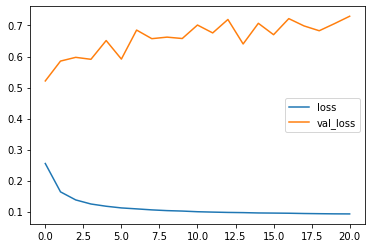

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
predictions = model.predict_classes(X_test2)

In [ ]:
print(classification_report(y_test2,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     19760
           1       0.64      1.00      0.78     19760

    accuracy                           0.71     39520
   macro avg       0.82      0.71      0.69     39520
weighted avg       0.82      0.71      0.69     39520



(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7321a9e860>)

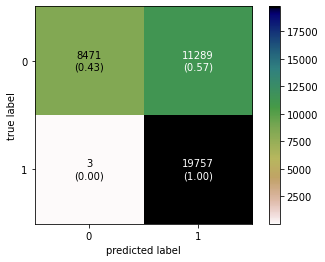

In [ ]:
plot_confusion_matrix(conf_mat=confusion_matrix(y_test2,predictions),
colorbar=True,  show_absolute=True, show_normed=True , cmap = 'gist_earth_r')



##Training test2 :
---

In [ ]:
X_test1 = scaler.transform(X_test1)

In [ ]:
#model.fit(x=X_train, 
#         y=y_train, 
#          epochs=40,
#          batch_size=256,
         # validation_data=(X_test2, y_test2), callbacks = [early_stop]
#          )

In [ ]:
#losses = pd.DataFrame(model.history.history)

In [ ]:
#losses[['loss','val_loss']].plot()

In [ ]:
predictions = model.predict_classes(X_test1)

In [ ]:
print(classification_report(y_test1,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     39521
           1       0.00      0.00      0.00         0

    accuracy                           0.43     39521
   macro avg       0.50      0.22      0.30     39521
weighted avg       1.00      0.43      0.60     39521



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:59: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f73219d6d30>)

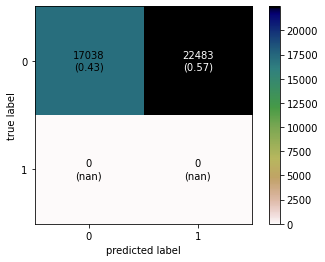

In [ ]:
plot_confusion_matrix(conf_mat=confusion_matrix(y_test1,predictions),
colorbar=True,  show_absolute=True, show_normed=True , cmap = 'gist_earth_r')



In [ ]:
model.save('loan_model2.h5')  

#Section 5: Forecasting using the model - would we offer this borrower a loan?
----




In [ ]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term           60.00   
int_rate       18.24   
installment    638.11  
annual_inc     61665.00
                 ...   
30723          1.00    
48052          0.00    
70466          0.00    
86630          0.00    
93700          0.00    
Name: 305323, Length: 78, dtype: float64

In [ ]:
new_cust = scaler.transform(new_customer.values.reshape(1,78))

In [ ]:
model.predict_classes(new_cust )

array([[1]], dtype=int32)

The model prediction is 1 - Fully paid

checking if this person actually end up paying back their loan :

In [ ]:
df.iloc[random_ind]['loan_repaid']

1.0

yes we are right ! 